# __パラメータチューニング__
__1. MNSITデータセットをダウンロードして、CNNでの学習を行う。ハイパーパラメータは以下のとおりである__  
*****
|パラメータ|説明|選択肢|
|:-:|:-:|:--:|
|`--epoch`|エポック数|30で統一|
|`--num_layer`|畳み込みの数|5で統一| 
|`--activation`|活性化関数|`ReLU`,`ELU`|  
|`--optimizer`|最適化手法|`Adam`,`MomentumSGD`|  
|`--weight_decay`|重み減衰|1e-10 ~ 1e-3|  
|`--adam_lr`|adam学習率|1e-5 ~ 1e-1|  
|`--momentum_sgd_lr`|sgd学習率|1e-5 ~ 1e-1|   
|`--mid_units`|結合層のユニット数|100 ~ 500|  
|`--num_filter`|各層のフィルタ数|16 ~ 128 の list|

各種パラメータを変更しながら、lossやtestの精度がどのように変化するのかを考察する

****
まずは下表に示すデフォルトパラメータで学習を行う

|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1e-6|
|adam_lr|1e-3|
|momentum_sgd_lr|1e-3|
|mid_units|250|
|num_filter|100.100.100.100.100.100|

[******************************] 100.00% (30/30)

train_loss = 0.004960848361254365
validation_loss = 0.04381860044551895
test_acc = 0.9924


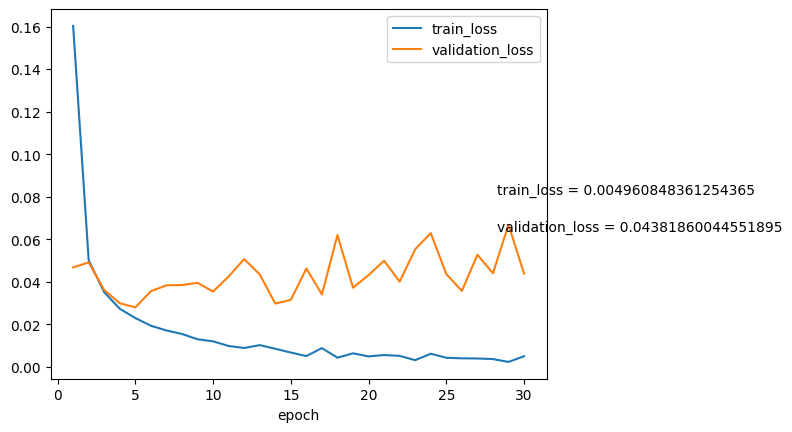

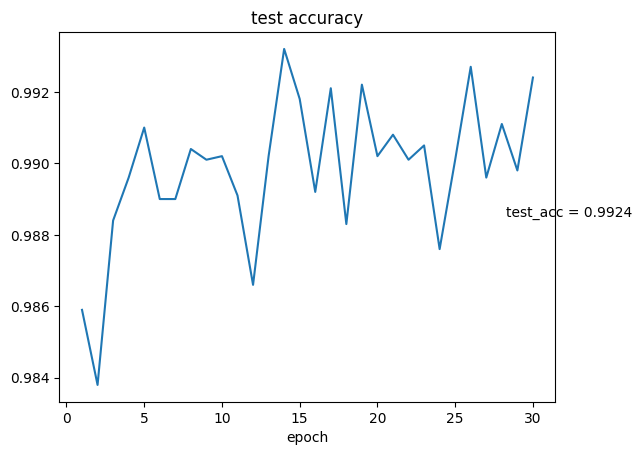

In [7]:
%run MNIST_train.py\
--epoch 30 --activation ReLU --optimizer Adam --weight_decay 1e-06 --adam_lr 1e-3 --momentum_sgd_lr 1e-3 --num_layer 5 --mid_units 100 --num_filter 100.100.100.100.100.100

***
activationをeluにしてみる
|パラメータ|値|
|:-|-|
|<span style="color:red;">activation</span>|<span style="color:red;">elu</span>|
|optimizer|Adam|
|weight_decay|1e-6|
|adam_lr|1e-3|
|momentum_sgd_lr|1e-3|
|mid_units|250|
|num_filter|100.100.100.100.100.100|

[******************************] 100.00% (30/30)

train_loss = 0.16380209650090652
validation_loss = 0.29732279464606726
test_acc = 0.9859


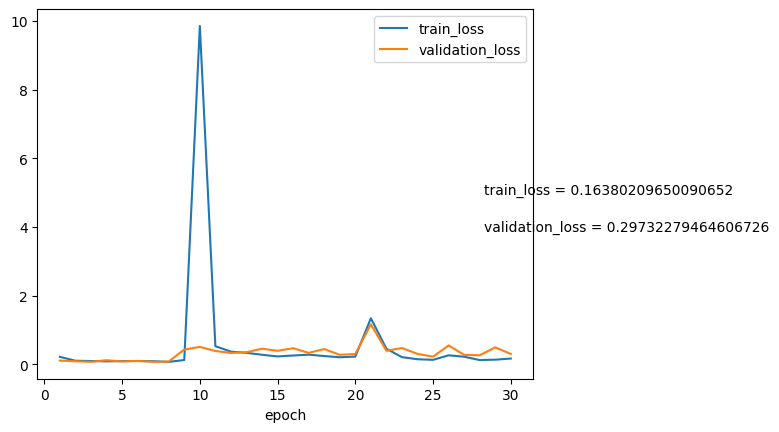

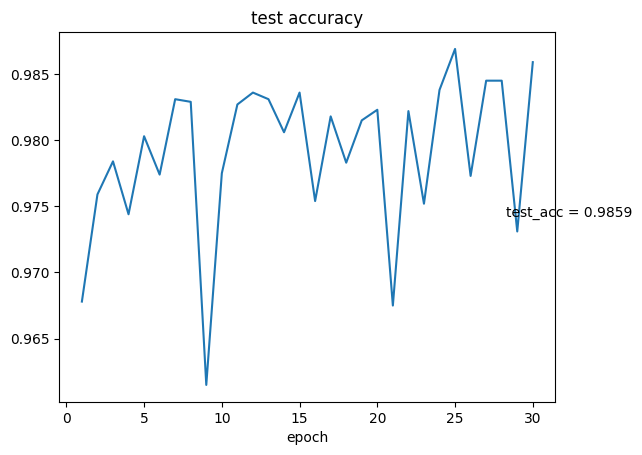

In [8]:
%run MNIST_train.py\
--activation elu 

reluの場合に比べて精度が低下していることがわかる
****
optimizerをAdamからMomentumSGDに変更してみる

|パラメータ|値|
|:-|-|
|activation|ReLU|
|<span style="color:red;">optimizer</span>|<span style="color:red;">MomentumSGD</span>|
|weight_decay|1e-6|
|adam_lr|1e-3|
|momentum_sgd_lr|1e-3|
|mid_units|250|
|num_filter|100.100.100.100.100.100|

[******************************] 100.00% (30/30)

train_loss = 0.024286347596264725
validation_loss = 0.04579926998281153
test_acc = 0.9867


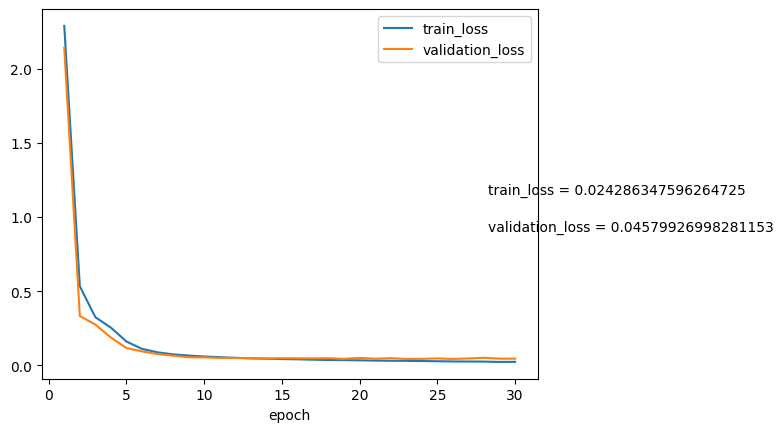

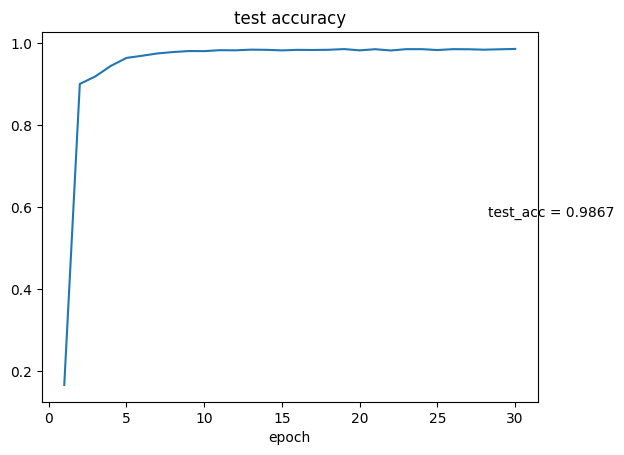

In [9]:
%run MNIST_train.py\
--optimizer MomentumSGD

***
重み減衰を1e-06の$\frac{1}{100}$倍の1e-08に縮小させると
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|<span style="color:red;">weight_decay</span>|<span style="color:red;">1e-08</span>|
|adam_lr|1e-3|
|momentum_sgd_lr|1e-3|
|mid_units|250|
|num_filter|100.100.100.100.100.100|

[******************************] 100.00% (30/30)

train_loss = 0.006384851302546233
validation_loss = 0.05124229439256455
test_acc = 0.9918


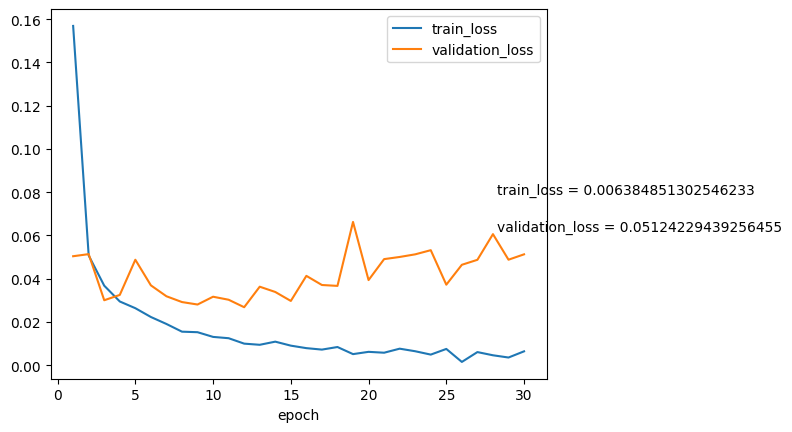

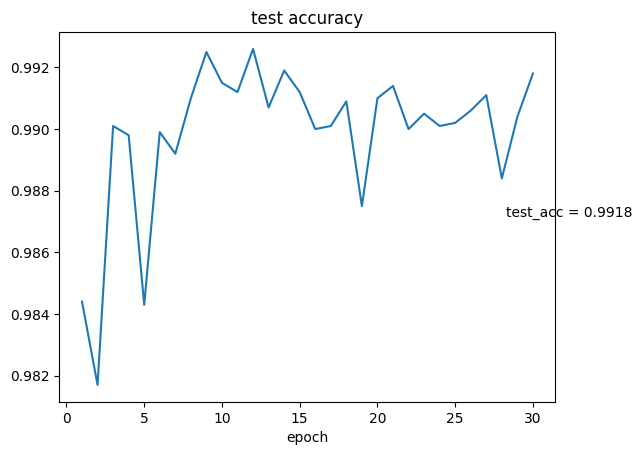

In [10]:
%run MNIST_train.py\
--weight_decay 1e-08 

***
重み減衰を1e-06の100倍の1e-04に変更してみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|<span style="color:red;">weight_decay</span>|<span style="color:red;">1e-04</span>|
|adam_lr|1e-3|
|momentum_sgd_lr|1e-3|
|mid_units|250|
|num_filter|100.100.100.100.100.100|

[******************************] 100.00% (30/30)

train_loss = 0.007727173139102388
validation_loss = 0.028467206977686146
test_acc = 0.9917


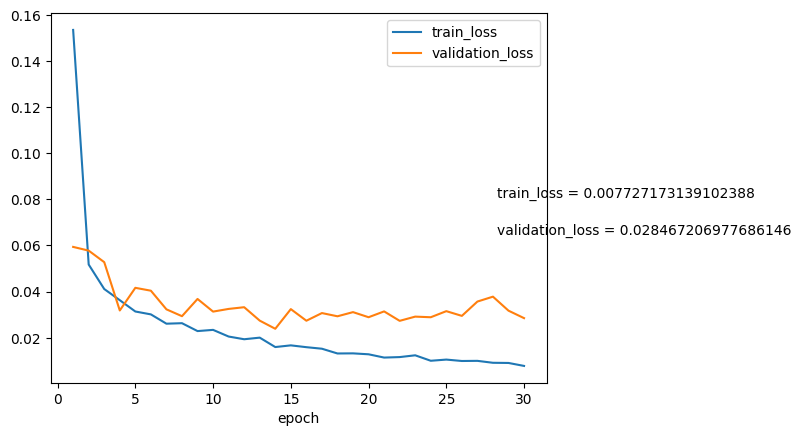

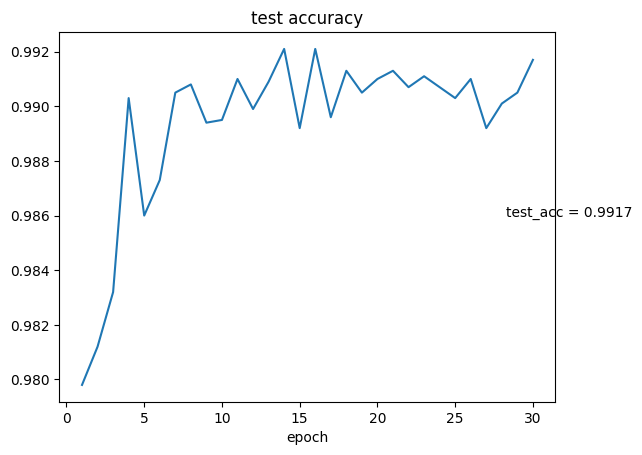

In [11]:
%run MNIST_train.py\
--weight_decay 1e-04

***
adam学習率を1e-03の10倍の1e-02に変更してみる
|パラメータ|値|
|:-|-|
|activation|ReLU|
|optimizer|Adam|
|weight_decay|1e-06|
|<span style="color:red;">adam_lr</span>|<span style="color:red;">1e-2</span>|
|momentum_sgd_lr|1e-3|
|mid_units|250|
|num_filter|100.100.100.100.100.100|

[******************************] 100.00% (30/30)

train_loss = 0.11588017050939392
validation_loss = 0.08566459046453237
test_acc = 0.9729


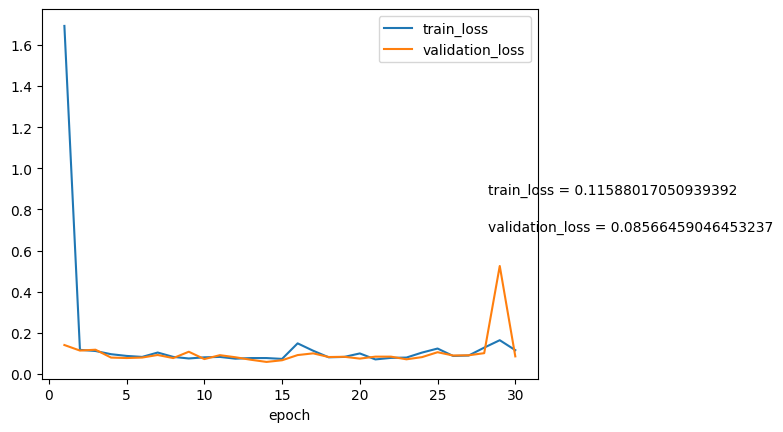

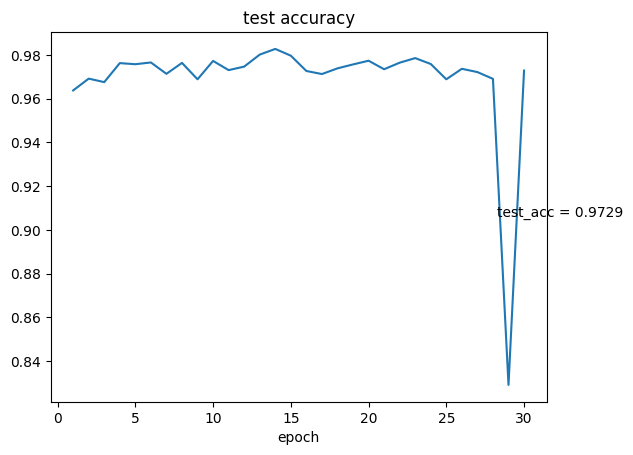

In [12]:
%run MNIST_train.py\
--adam_lr 1e-2

[******************************] 100.00% (30/30)

train_loss = 0.003859143431943605
validation_loss = 0.056124846228316747
test_acc = 0.9892


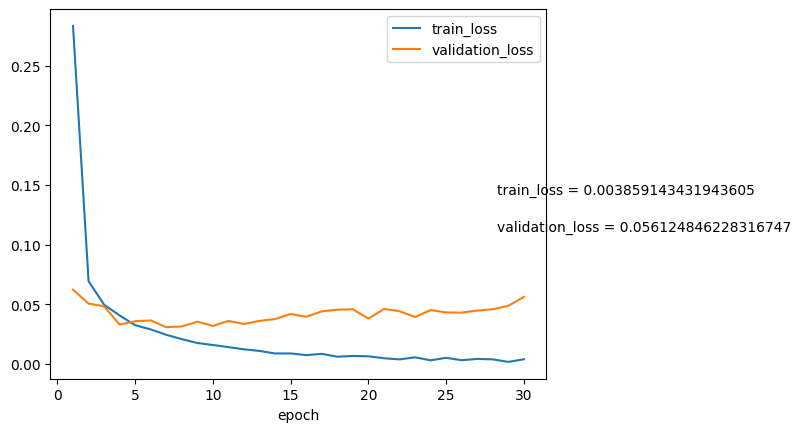

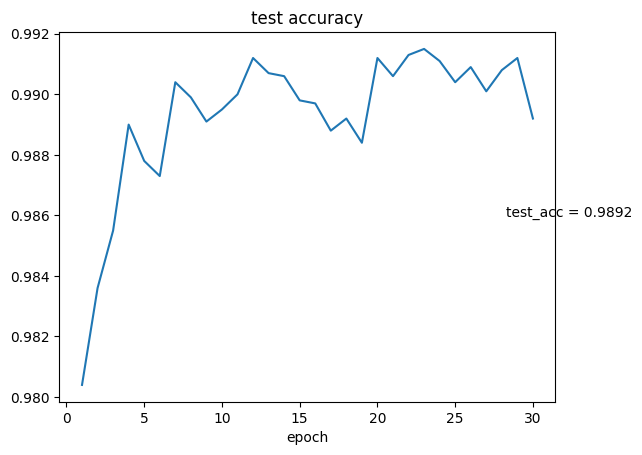

In [15]:
%run MNIST_train.py\
--adam_lr 1e-4

[******************************] 100.00% (30/30)

train_loss = 0.006614261937359802
validation_loss = 0.051975641502854684
test_acc = 0.9899


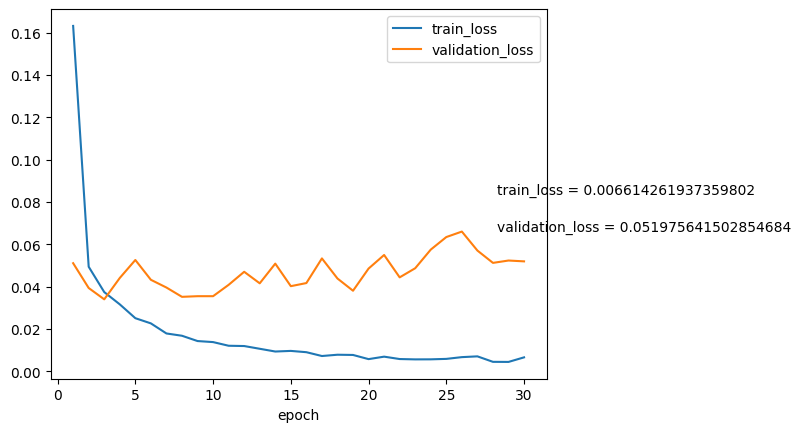

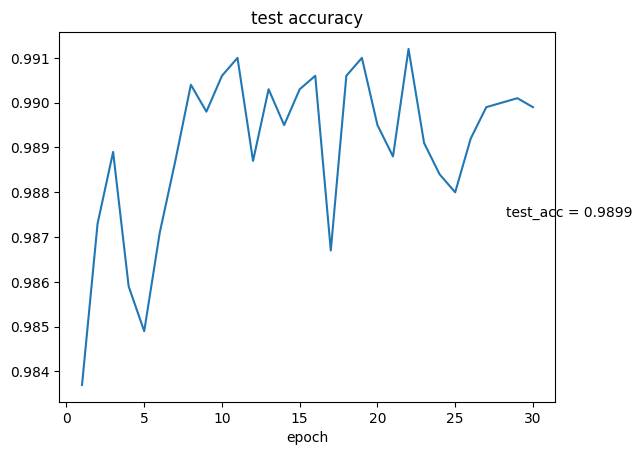

In [16]:
%run MNIST_train.py\
--num_filter 100.60.70.80.90.100

In [27]:
%run Optuna.py

ModuleNotFoundError: No module named 'optuna'

In [14]:
!nvidia-smi

Wed Jul 12 13:39:09 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4080        Off | 00000000:01:00.0  On |                  N/A |
| 46%   55C    P2             139W / 320W |   6002MiB / 16376MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--